# lab7 & 8

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
plt.rcParams["figure.figsize"] = (6,3)

# import library
import pickle

## lab7: Event selection optimization

In [2]:
# open the file of interest, and use pickle loading
infile1 = open ("higgs_100000_pt_1000_1200.pkl",'rb')
new_dict1 = pickle.load(infile1)
infile2 = open ("qcd_100000_pt_1000_1200.pkl",'rb')
new_dict2 = pickle.load(infile2)

In [3]:
# import data into array variable
higgs_data = np.array(new_dict1)
qcd_data = np.array(new_dict2)

"higgs" -- signal dataset

"qcd" -- background dataset

In [4]:
# a brief table of the higgs data
table1 = pd.DataFrame(higgs_data)
table1.columns = [ 'pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']
table1

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1130.533498,0.075569,-2.535979,126.390705,0.050194,0.000198,1.565921,0.000846,0.710011,0.318588,0.201156,0.448709,0.631396,0.236212
1,1040.287356,-0.917809,-0.511002,125.735472,0.068068,0.000259,0.822408,0.000093,1.070693,0.243505,0.149150,0.227427,0.612512,0.223529
2,1042.978241,0.431547,-1.287136,125.946948,0.054627,0.000189,1.159519,0.000493,0.707240,0.196842,0.161801,0.278324,0.821986,0.284253
3,1173.988224,-1.000457,-0.567291,133.475055,0.057164,0.000211,1.131290,0.000316,1.586268,0.213899,0.137810,0.134844,0.644277,0.216328
4,1158.143085,-0.205305,2.778395,135.047319,0.028222,0.000114,5.084335,0.004804,0.644669,0.259307,0.242958,0.402232,0.936954,0.443097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1081.930827,-0.292886,-0.066601,128.449819,0.062010,0.000188,0.788336,0.000623,0.984561,0.132130,0.106621,0.134201,0.806947,0.223551
99996,1114.171856,-0.071148,-0.518420,128.133729,0.060090,0.000269,1.239701,0.000745,0.863711,0.297420,0.248208,0.344352,0.834536,0.224712
99997,1066.593095,0.776745,-2.067399,125.351507,0.063063,0.000260,1.036221,0.000161,1.545428,0.230121,0.177881,0.148904,0.772991,0.231622
99998,1043.746312,-0.403642,1.761954,125.477362,0.065217,0.000204,0.736390,0.000253,1.147794,0.208940,0.162744,0.182036,0.778902,0.222911


In [5]:
# a brief table of the qcd data
table2 = pd.DataFrame(qcd_data)
table2.columns = [ 'pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']
table2

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1034.181543,1.193191,2.942234,272.010881,0.102485,0.003492,3.244343,0.006256,0.961697,0.598986,0.425024,0.622843,0.709573,0.082995
1,1125.535509,-1.833090,0.121390,139.794408,0.035430,0.000288,6.481473,0.000155,0.896003,0.633385,0.476566,0.706900,0.752412,0.439346
2,1099.223087,0.557867,-1.238027,245.413146,0.099080,0.002563,2.634788,0.005682,0.861678,0.486505,0.264631,0.564602,0.543942,0.251453
3,1118.230032,1.505473,1.953123,89.975916,0.017950,0.000077,13.389845,0.000432,0.952917,0.856141,0.730438,0.898442,0.853175,0.121666
4,1059.907996,-0.387179,-1.064832,85.893956,0.018515,0.000072,11.342156,0.002575,0.868770,0.645362,0.484853,0.742845,0.751289,0.386788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1185.924965,-1.282700,-2.203558,178.917178,0.051779,0.000606,4.368135,0.000900,0.671057,0.294523,0.255893,0.438894,0.868838,0.282015
99996,1070.385446,-0.762397,-2.405166,143.872351,0.032136,0.000224,6.749812,0.002829,0.718651,0.293553,0.268076,0.408478,0.913209,0.261662
99997,1116.722590,-0.166511,-1.141038,118.185074,0.049617,0.000331,2.712970,0.002456,0.859900,0.642900,0.456476,0.747645,0.710027,0.147913
99998,1147.609045,0.405501,-1.125710,292.925318,0.129771,0.004310,1.972101,0.005786,0.930685,0.672938,0.361115,0.723057,0.536624,0.567817


### part 1) stacked histogram for MASS

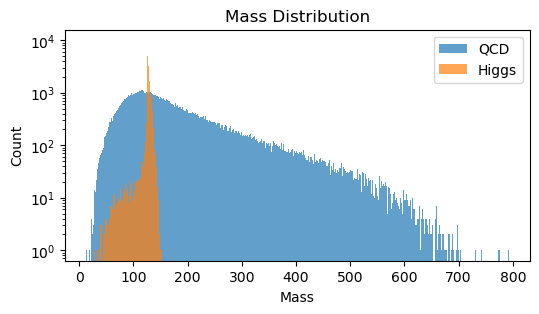

In [6]:
higgs_mass = higgs_data[:,3]
qcd_mass = qcd_data[:,3]
# a stacked histogram plot for the mass variable
plt.hist(qcd_mass, bins = 500,alpha = 0.7, label = 'QCD') 
plt.hist(higgs_mass, bins = 500,alpha = 0.7, label = 'Higgs') 
plt.xlabel('Mass') 
plt.ylabel('Count')
plt.yscale('log')
plt.title('Mass Distribution') 
plt.legend(loc = 'best')
plt.show()

In [7]:
higgs_hist = np.histogram(higgs_mass, bins = 200, weights = 50 * np.ones(len(higgs_mass)) / len(higgs_mass))
higgs_mode = higgs_hist[1][np.where(higgs_hist[0] == higgs_hist[0].max())]
print('The mode mass of higgs is',higgs_mode[0])

mu1 = np.mean(higgs_mass)
print('The mean mass of higgs is', mu1)

mu2 = np.mean(qcd_mass)
print('The mean mass of qcd is', mu2)

The mode mass of higgs is 124.94994843715949
The mean mass of higgs is 126.663832224776
The mean mass of qcd is 177.27313143544927


Evaluate expected significance without event selection

We can assume that the distribution of qcd and Higgs are both Poisson distribution. And we also know the expected yields number, then N_qcd = 2000 and N_higgs = 50. Here, N_total = 2000+50 = 2050. Then, we use the 2050 and 2000 below to do the significance calculation using the Poisson statistics.

In [8]:
# exact significance calculation -- Poisson statistics
sig = stats.norm.isf(stats.poisson.sf(2050, 2000))
print('The expected significance is' , sig)

The expected significance is 1.1282230087754423


In [9]:
# the approximation 𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷)
print('𝑁_𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷) is {:.4f}'.format(50/np.sqrt(2000)))

𝑁_𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷) is 1.1180


Findinds: With comparsion, We find the exact significance and the approximation from the equation are very close to each other, with a slight difference about 0.01.

From the central limit theorem, we can find that the Poisson distribution is cloase to the Gaussian distribution. Here, we can use 𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷) to approximate significance.

## part 2
Identify mass cuts to optimize the expected significance.

In [10]:
# upper boundary
cuts1 = np.linspace(120,max(higgs_mass),15)

for i in range(len(cuts1)):
    count1 = 0
    count2 = 0
    for j in range(len(higgs_mass)):
        if higgs_mass[j] <= cuts1[i]:
            count1 += 1
        if qcd_mass[j] <= cuts1[i]:
            count2 += 1
    print("Mass cut: {:.2f}".format(cuts1[i])) 
    sig = (count1*50/100000)/(np.sqrt(count2*2000/100000))
    print("Expected significance: {:.3f}".format(sig))
    i += 1  

Mass cut: 120.00
Expected significance: 0.079
Mass cut: 122.47
Expected significance: 0.094
Mass cut: 124.94
Expected significance: 0.157
Mass cut: 127.42
Expected significance: 1.066
Mass cut: 129.89
Expected significance: 1.416
Mass cut: 132.36
Expected significance: 1.550
Mass cut: 134.83
Expected significance: 1.638
Mass cut: 137.31
Expected significance: 1.657
Mass cut: 139.78
Expected significance: 1.648
Mass cut: 142.25
Expected significance: 1.630
Mass cut: 144.72
Expected significance: 1.611
Mass cut: 147.20
Expected significance: 1.590
Mass cut: 149.67
Expected significance: 1.570
Mass cut: 152.14
Expected significance: 1.551
Mass cut: 154.61
Expected significance: 1.533


In [11]:
# lower boundary
cuts2 = np.linspace(95,130,15)

for i in range(len(cuts2)):
    count3 = 0
    count4 = 0
    for j in range(len(higgs_mass)):
        if higgs_mass[j] >= cuts2[i]:
            count3 += 1
        if qcd_mass[j] >= cuts2[i]:
            count4 += 1
    sig = (count3*50/100000)/(np.sqrt(count4*2000/100000))
    print("Mass cut: {:.2f}".format(cuts2[i])) 
    print("Expected significance: {:.3f}".format(sig))
    i += 1

Mass cut: 95.00
Expected significance: 1.203
Mass cut: 97.50
Expected significance: 1.213
Mass cut: 100.00
Expected significance: 1.222
Mass cut: 102.50
Expected significance: 1.232
Mass cut: 105.00
Expected significance: 1.243
Mass cut: 107.50
Expected significance: 1.253
Mass cut: 110.00
Expected significance: 1.265
Mass cut: 112.50
Expected significance: 1.277
Mass cut: 115.00
Expected significance: 1.289
Mass cut: 117.50
Expected significance: 1.300
Mass cut: 120.00
Expected significance: 1.310
Mass cut: 122.50
Expected significance: 1.313
Mass cut: 125.00
Expected significance: 1.227
Mass cut: 127.50
Expected significance: 0.573
Mass cut: 130.00
Expected significance: 0.289


With comparsion, we find the set of mass cuts (122.52, 137.31) will return the highest significance. 

In [12]:
count5 = 0
count6 = 0
for j in range(len(higgs_mass)):
    if higgs_mass[j] >= 122.52 and higgs_mass[j] <= 137.31:
        count5 += 1
    if qcd_mass[j] >= 122.52 and qcd_mass[j] <= 137.31:
        count6 += 1
print(count5)
print(count6)
sig = (count5*50/100000)/(np.sqrt(count6*2000/100000))
print("Expected significance: {:.3f}".format(sig))

93242
9353
Expected significance: 3.409


With calcualtion, the set of mass cuts (122.52, 137.31) will return the  significance value of 3.409. 

## part3）
stacked histogram for other features. Set A is the set without any event selection, while Set B is the set with optimal mass cuts.

#### Set A 
without any event selection

In [13]:
def pltFunct(num, keyName):
    plt.hist(higgs_data[:,num], bins=100, density=True, alpha = 0.7,label='Higgs')
    plt.hist(qcd_data[:,num], bins=100, density=True, alpha = 0.7,label='QCD')
    plt.legend()
    plt.xlabel(keyName)
    plt.ylabel('Density')
    #plt.yscale('log')
    plt.title(f'{keyName} distrubution')
    plt.show()

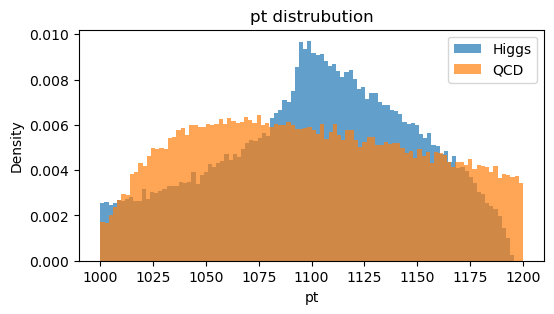

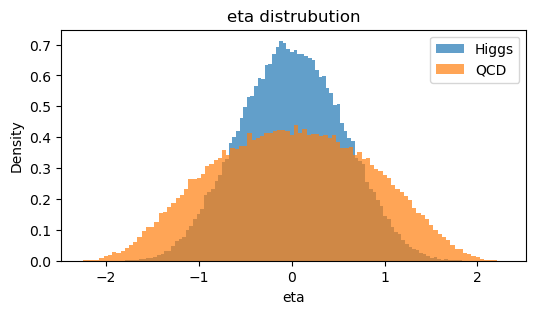

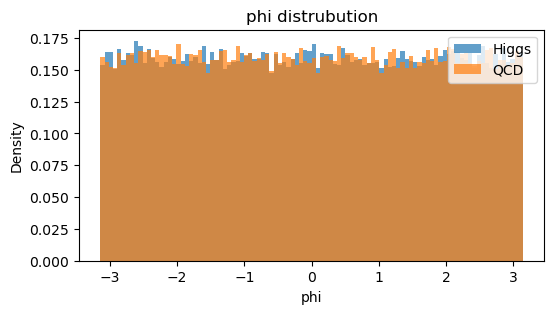

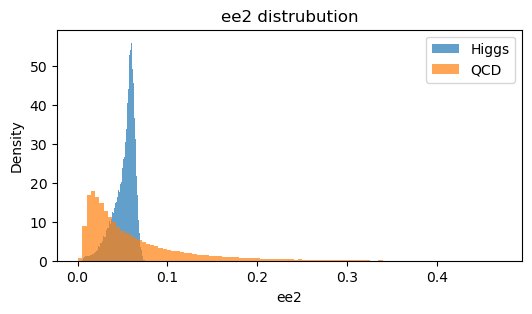

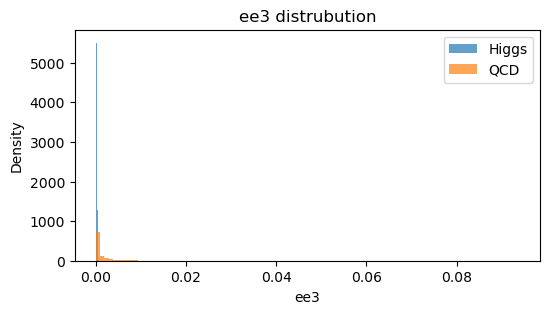

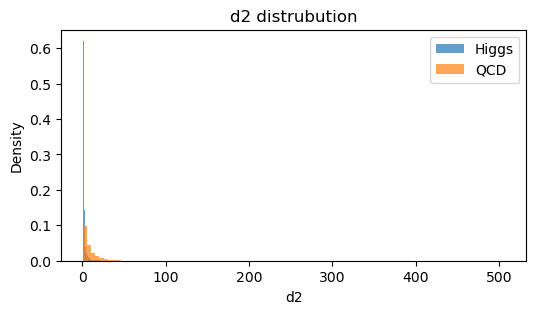

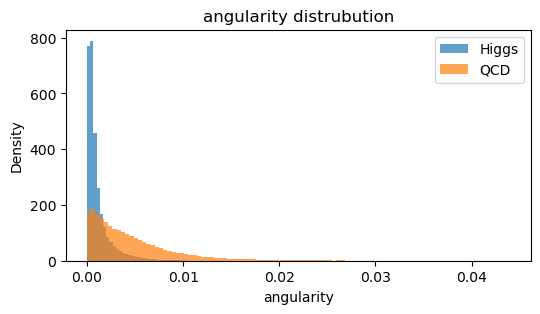

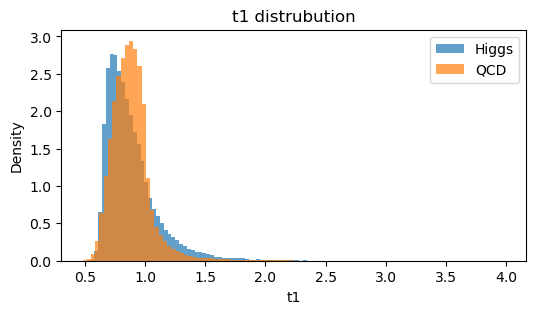

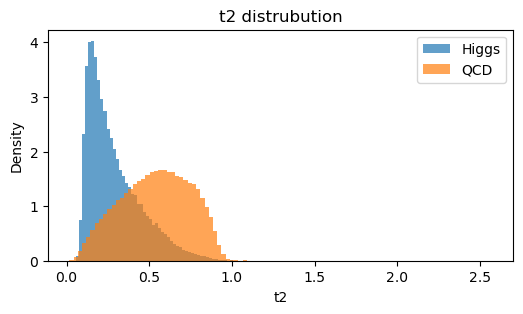

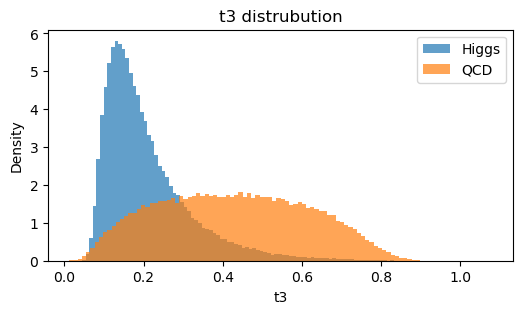

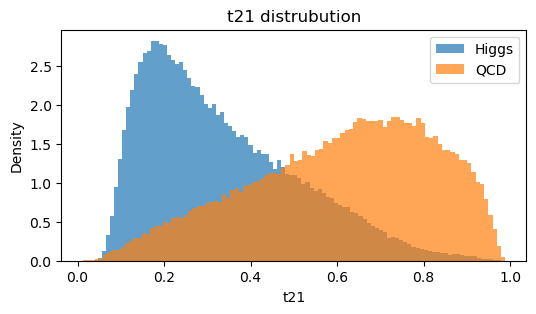

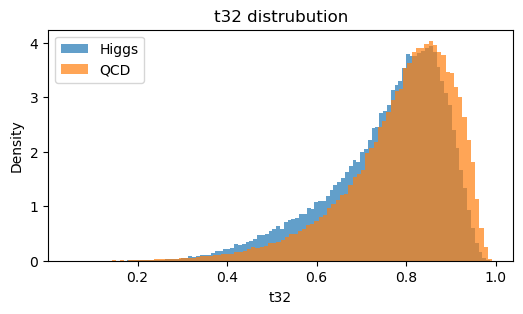

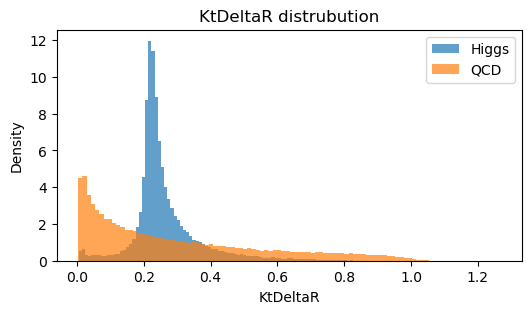

In [14]:
for i in range(14):
    if i != 3: #no mass 
        key = table1.columns[i]
        pltFunct(i, table1.columns[i])

Features as discriminative as mass(i.e. equal or better significance after feature cut): pt, ee2, t2, t3, t21, ktDeltaR.

#### Set B 
Histograms with optimal mass cuts (122.52, 137.31), will take (122, 138)

In [15]:
def pltOpt(num, keyName):
    
    higgs_cut = higgs_data[higgs_data[:,3]>122]
    higgs_cut2 = higgs_cut[higgs_cut[:,3]<138]
    qcd_cut = qcd_data[qcd_data[:,3]>122]
    qcd_cut2 = qcd_cut[qcd_cut[:,3]<138]
    
    plt.hist(higgs_cut2[:,num], bins=100, density=True, alpha = 0.7,label='Higgs')
    plt.hist(qcd_cut2[:,num], bins=100, density=True, alpha = 0.7,label='QCD')
    plt.legend()
    plt.xlabel(keyName)
    plt.ylabel('Density')
    #plt.yscale('log')
    plt.title(f'{keyName} distrubution with optimal mass cuts')
    #plt.show()

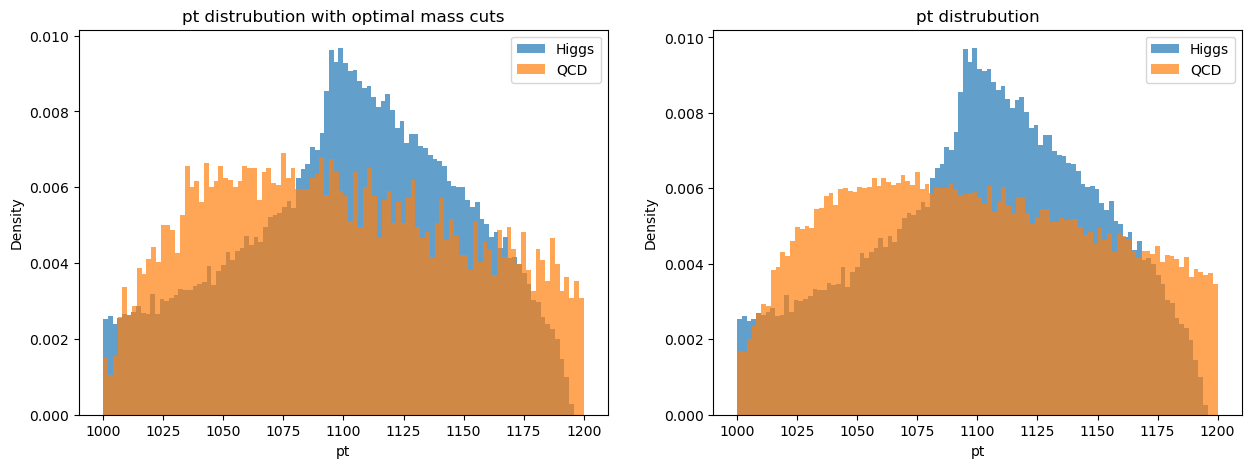

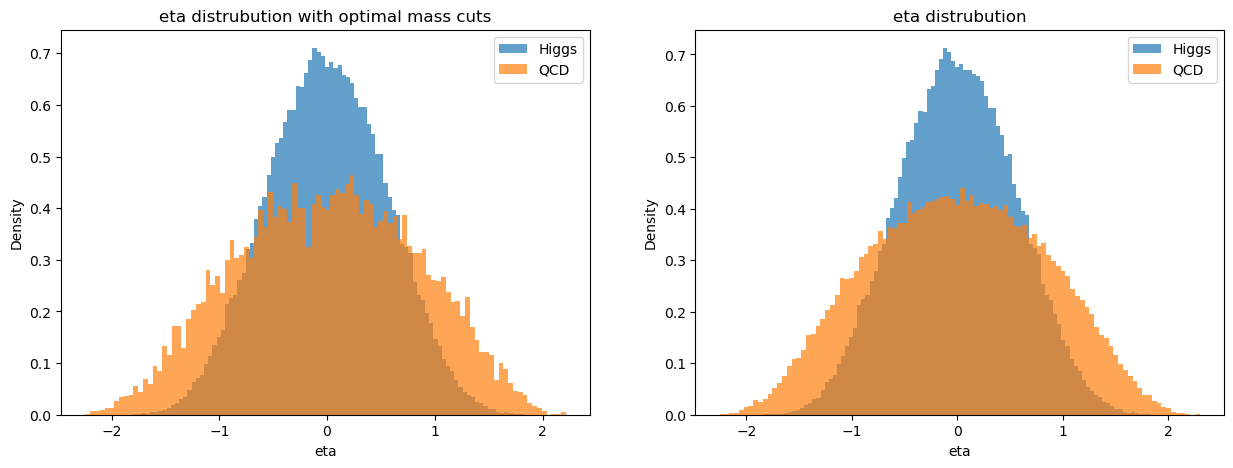

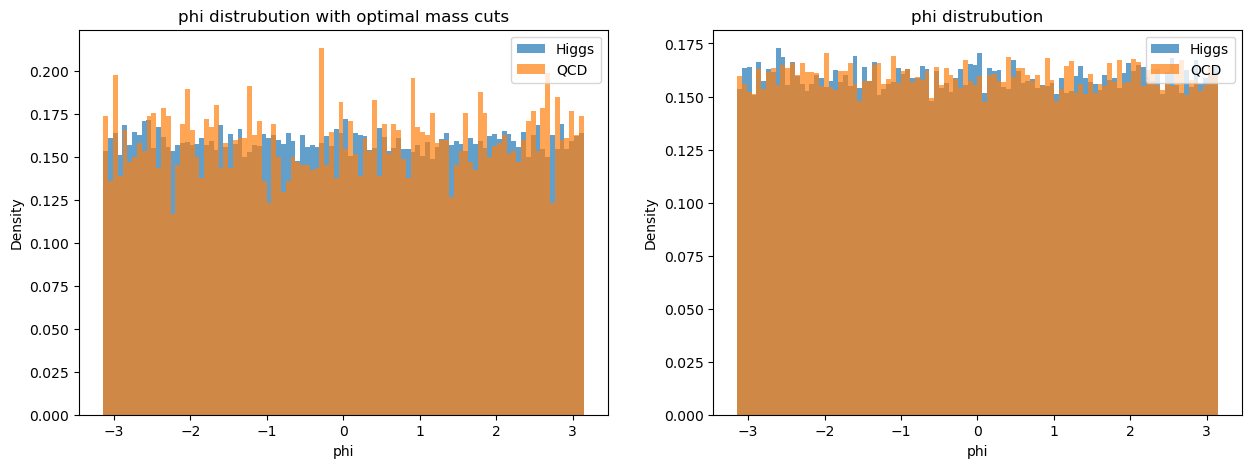

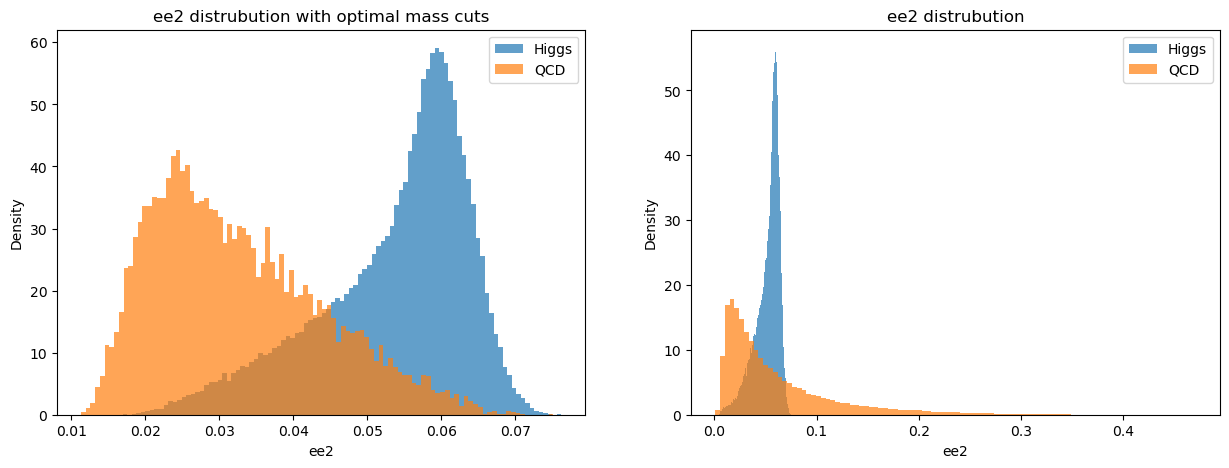

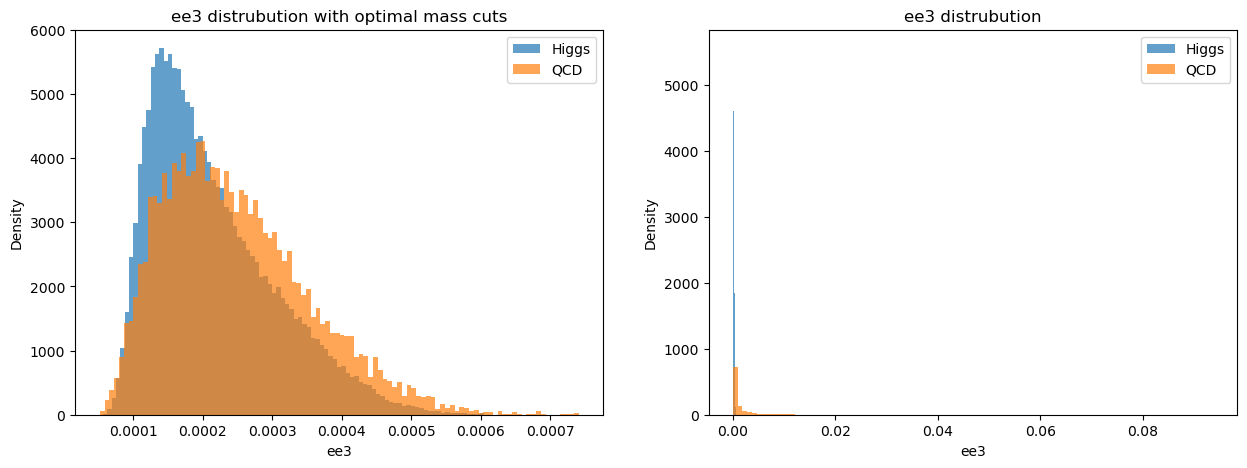

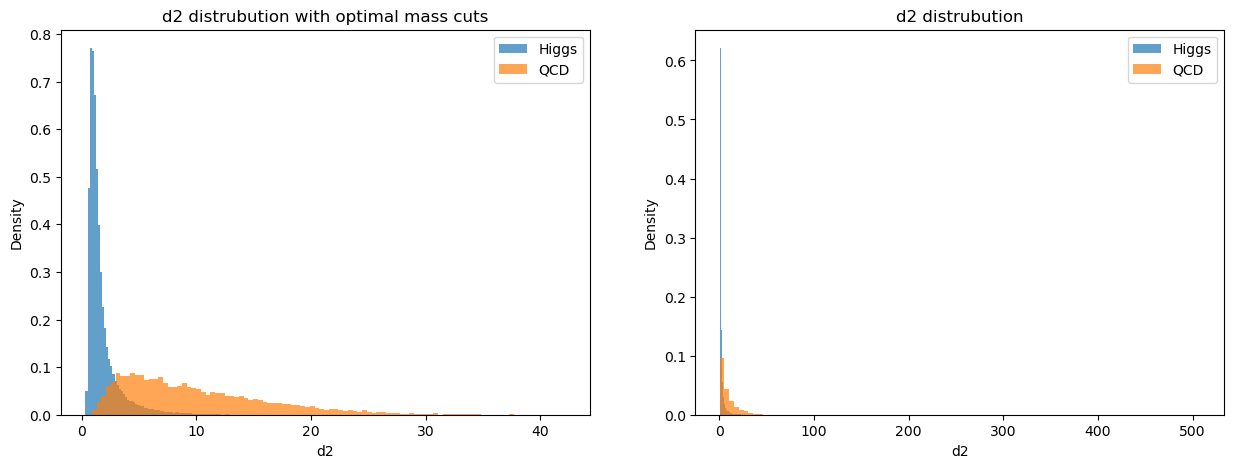

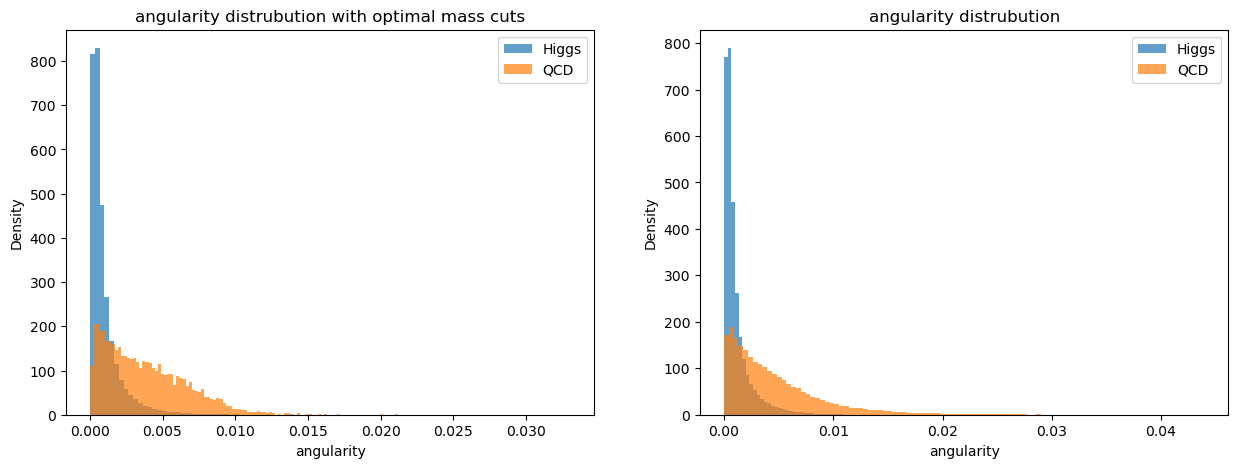

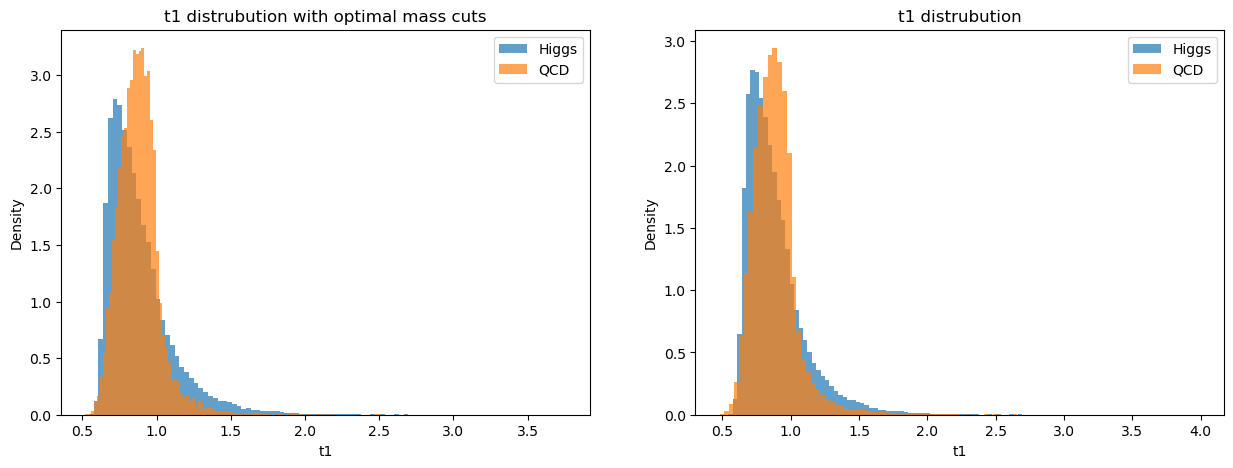

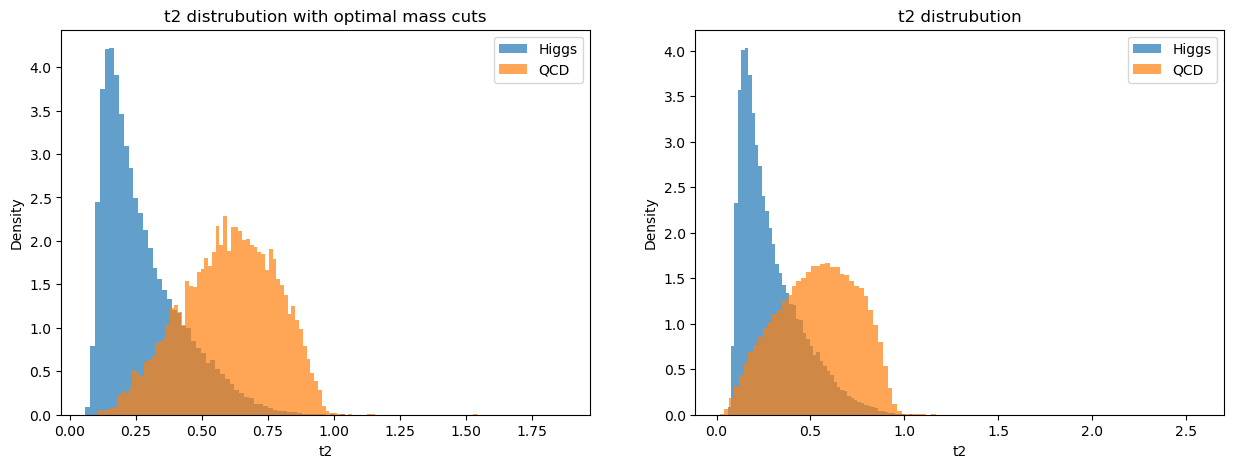

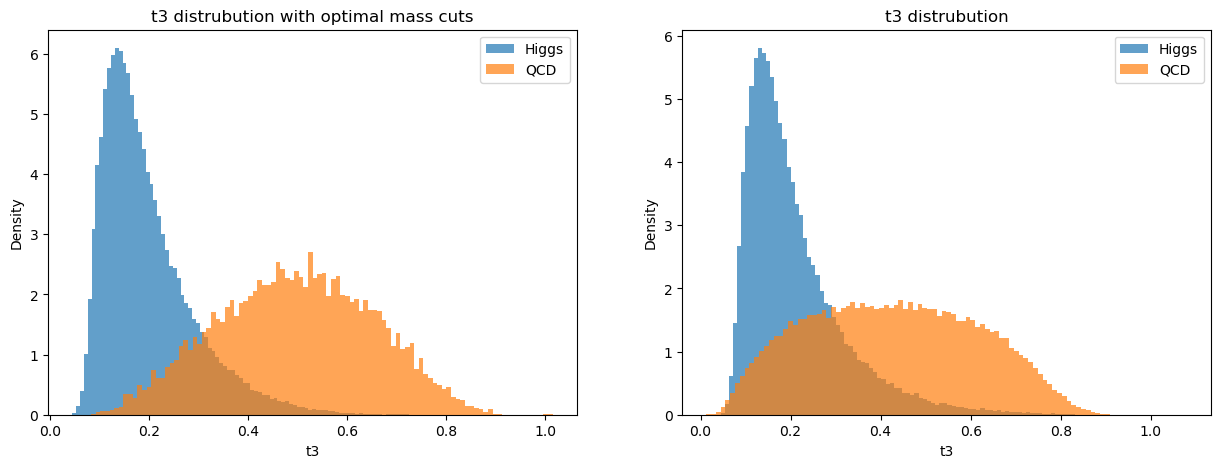

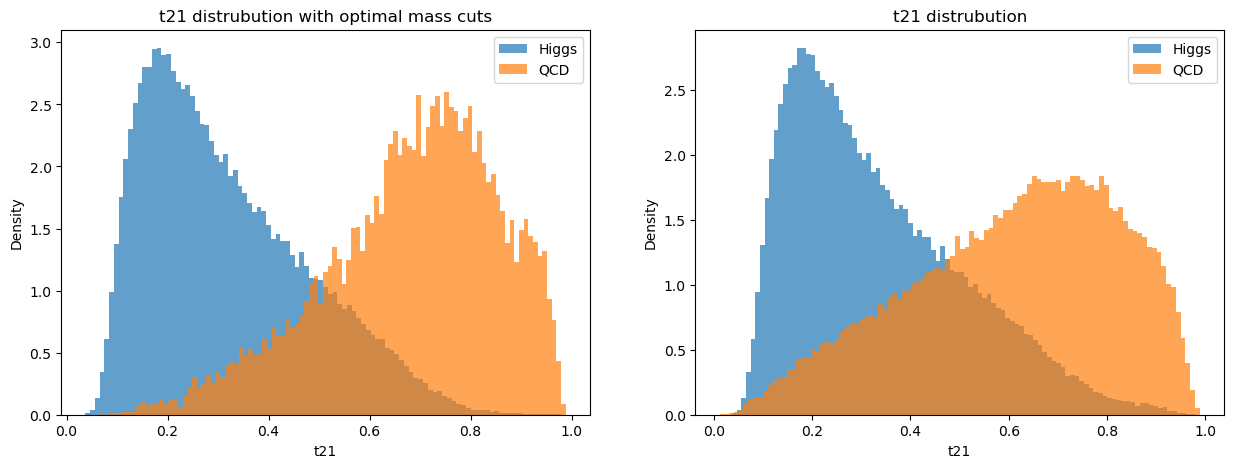

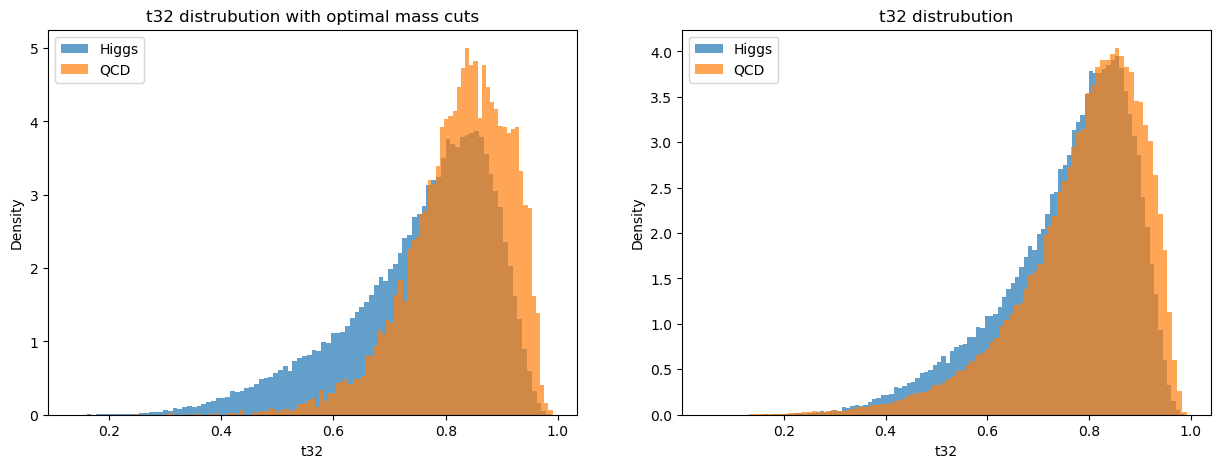

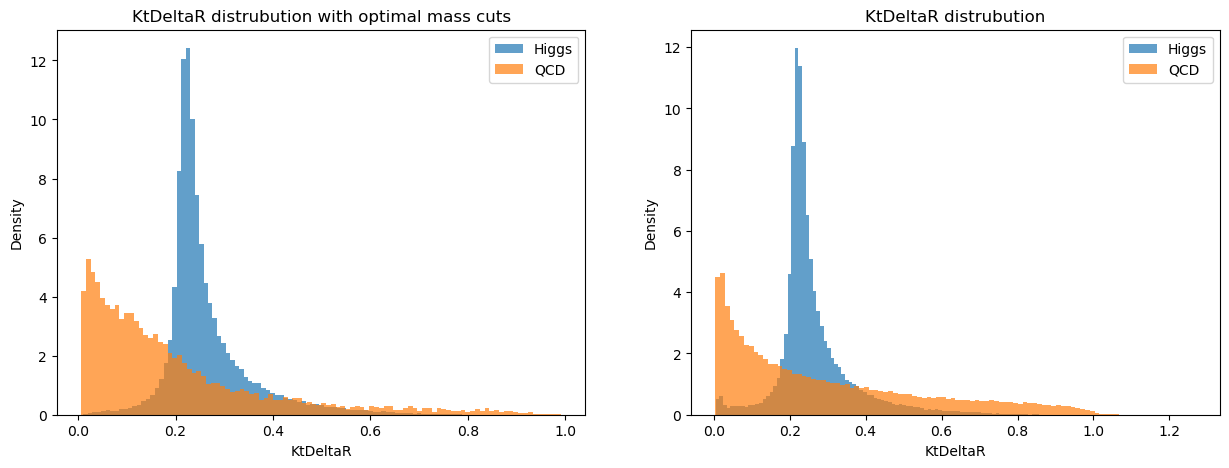

In [16]:
for i in range(14):
    if i != 3: #no mass
        key = table1.columns[i]
        # left are histograms with optimal mass cuts
        plt.figure(figsize=(15,5))             
        plt.subplot(1,2,1)
        pltOpt(i, table1.columns[i])
        
        # right are orignal histograms 
        plt.subplot(1,2,2)
        pltFunct(i, table1.columns[i])
        plt.show()

In [17]:
table2.corr()

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
pt,1.000000,0.000083,-0.006469,0.095461,0.012772,0.006981,-0.003817,0.032309,-0.010783,-0.027798,-0.033102,-0.027596,-0.024690,0.024390
eta,0.000083,1.000000,0.001784,0.000767,0.000499,0.001447,-0.002371,0.000908,-0.002803,-0.001568,-0.001840,-0.000351,-0.000405,-0.002086
phi,-0.006469,0.001784,1.000000,-0.005159,-0.003282,-0.003464,0.001273,-0.008891,0.002601,0.000465,0.001326,-0.000321,0.002848,-0.003087
mass,0.095461,0.000767,-0.005159,1.000000,0.959965,0.793991,-0.538750,0.529638,0.010450,-0.533355,-0.621826,-0.585519,-0.459640,0.708356
ee2,0.012772,0.000499,-0.003282,0.959965,1.000000,0.844699,-0.567445,0.427854,0.126657,-0.517926,-0.620038,-0.613574,-0.495083,0.614471
ee3,0.006981,0.001447,-0.003464,0.793991,0.844699,1.000000,-0.306321,0.433308,0.138780,-0.250764,-0.350501,-0.323984,-0.412092,0.459877
d2,-0.003817,-0.002371,0.001273,-0.538750,-0.567445,-0.306321,1.000000,-0.184381,-0.022127,0.554533,0.622112,0.619491,0.325022,-0.392433
angularity,0.032309,0.000908,-0.008891,0.529638,0.427854,0.433308,-0.184381,1.000000,-0.052497,-0.152266,-0.196199,-0.155062,-0.190053,0.406357
t1,-0.010783,-0.002803,0.002601,0.010450,0.126657,0.138780,-0.022127,-0.052497,1.000000,0.326725,0.238284,-0.002957,-0.146209,-0.271773
t2,-0.027798,-0.001568,0.000465,-0.533355,-0.517926,-0.250764,0.554533,-0.152266,0.326725,1.000000,0.936640,0.926364,0.129887,-0.635300


In [18]:
table3 = table2.corr()
column_a = (table3-np.eye(len(table3))).max()
column_b = (table3-np.eye(len(table3))).idxmax()
pd.DataFrame([column_a,column_b]).T

,0,1
pt,0.095461,mass
eta,0.001784,phi
phi,0.002848,t32
mass,0.959965,ee2
ee2,0.959965,mass
ee3,0.844699,ee2
d2,0.622112,t3
angularity,0.529638,mass
t1,0.326725,t2
t2,0.93664,t3


From the plots and table above, d2 or KtDeltaR can be another feature to further improve the expected significance. 

## part 4) Optimize event selections

Find a set of feature cuts which achieve high expected significance.


We will try d2, KtDeltaR, t2, t3.

In [19]:
def feature_cuts(column, lower, upper): 
    # mass cut
    higgs_cut = higgs_data[higgs_data[:,3]>122]
    higgs_cut2 = higgs_cut[higgs_cut[:,3]<138]
    qcd_cut = qcd_data[qcd_data[:,3]>122]
    qcd_cut2 = qcd_cut[qcd_cut[:,3]<138]
    
    # another feature cut
    higgs_cut3 = higgs_cut2[higgs_cut2[:,column] >= lower]
    higgs_cut4 = higgs_cut3[higgs_cut3[:,column] <= upper]
    qcd_cut3 = qcd_cut2[qcd_cut2[:,column] >= lower]
    qcd_cut4 = qcd_cut3[qcd_cut3[:,column] <= upper]
    
    #normalize data
    sig = (len(higgs_cut4[:,column])*50/100000)/(np.sqrt(len(qcd_cut4[:,column])*2000/100000))
    
    print("Mass cut: ({:.2f},{:.2f})".format(lower, upper))
    print("Expected significance: {:.4f}".format(sig))

In [20]:
# d2
for i in range(1, 20):
    feature_cuts (6, 1, 1+0.05*i)

Mass cut: (1.00,1.05)
Expected significance: 5.9238
Mass cut: (1.00,1.10)
Expected significance: 6.8280
Mass cut: (1.00,1.15)
Expected significance: 8.4334
Mass cut: (1.00,1.20)
Expected significance: 9.5122
Mass cut: (1.00,1.25)
Expected significance: 10.4626
Mass cut: (1.00,1.30)
Expected significance: 10.3083
Mass cut: (1.00,1.35)
Expected significance: 10.6066
Mass cut: (1.00,1.40)
Expected significance: 10.8394
Mass cut: (1.00,1.45)
Expected significance: 10.5108
Mass cut: (1.00,1.50)
Expected significance: 10.4558
Mass cut: (1.00,1.55)
Expected significance: 10.2931
Mass cut: (1.00,1.60)
Expected significance: 10.1578
Mass cut: (1.00,1.65)
Expected significance: 9.8342
Mass cut: (1.00,1.70)
Expected significance: 9.8396
Mass cut: (1.00,1.75)
Expected significance: 9.7101
Mass cut: (1.00,1.80)
Expected significance: 9.6902
Mass cut: (1.00,1.85)
Expected significance: 9.4416
Mass cut: (1.00,1.90)
Expected significance: 9.1869
Mass cut: (1.00,1.95)
Expected significance: 9.0343


Hence, the d2 set of cuts is (1,1.4), siginificance is 10.8394

In [21]:
# KtDeltaR
for i in range(1, 10):
    feature_cuts (13, 0.3, 0.3 + 0.05 * i)

Mass cut: (0.30,0.35)
Expected significance: 1.3994
Mass cut: (0.30,0.40)
Expected significance: 1.6356
Mass cut: (0.30,0.45)
Expected significance: 1.7132
Mass cut: (0.30,0.50)
Expected significance: 1.7386
Mass cut: (0.30,0.55)
Expected significance: 1.7472
Mass cut: (0.30,0.60)
Expected significance: 1.7386
Mass cut: (0.30,0.65)
Expected significance: 1.7093
Mass cut: (0.30,0.70)
Expected significance: 1.6805
Mass cut: (0.30,0.75)
Expected significance: 1.6447


Hence, the KtDeltaR set of cuts is (0.3,0.55), siginificance is 1.7472

In [22]:
# t2
for i in range(1, 10):
    feature_cuts (10, 0.25, 0.25 + 0.02* i)

Mass cut: (0.25,0.27)
Expected significance: 1.0359
Mass cut: (0.25,0.29)
Expected significance: 1.2755
Mass cut: (0.25,0.31)
Expected significance: 1.3917
Mass cut: (0.25,0.33)
Expected significance: 1.4079
Mass cut: (0.25,0.35)
Expected significance: 1.3957
Mass cut: (0.25,0.37)
Expected significance: 1.3550
Mass cut: (0.25,0.39)
Expected significance: 1.3274
Mass cut: (0.25,0.41)
Expected significance: 1.2820
Mass cut: (0.25,0.43)
Expected significance: 1.2306


Hence, the t2 set of cuts is (0.25,0.33), siginificance is 1.4079

In [23]:
# t3
for i in range(1, 12):
    feature_cuts (11, 0.25, 0.25 + 0.02* i)

Mass cut: (0.25,0.27)
Expected significance: 2.2600
Mass cut: (0.25,0.29)
Expected significance: 3.0105
Mass cut: (0.25,0.31)
Expected significance: 3.4342
Mass cut: (0.25,0.33)
Expected significance: 3.6724
Mass cut: (0.25,0.35)
Expected significance: 3.8201
Mass cut: (0.25,0.37)
Expected significance: 3.9083
Mass cut: (0.25,0.39)
Expected significance: 4.0042
Mass cut: (0.25,0.41)
Expected significance: 4.0214
Mass cut: (0.25,0.43)
Expected significance: 3.9911
Mass cut: (0.25,0.45)
Expected significance: 3.9745
Mass cut: (0.25,0.47)
Expected significance: 3.9394


Hence, the t3 set of cuts is (0.25,0.41), siginificance is 4.0214

Findings:
both outcomes from my partner and mine point out that d2 is another set of most discriminative features. The reason I think it is because d2 variable is relatively independent from the mass variable and other variables. I will use the d2 feature to plot 2D scatter below. 

## Bonus
Plot 2-dimensional plots using the top two most discriminative features

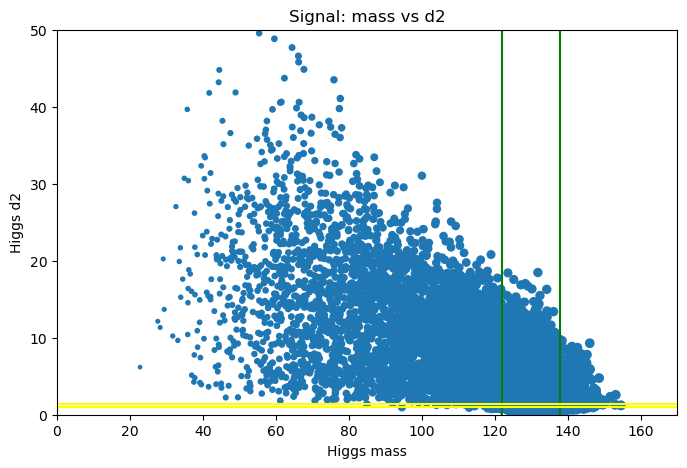

In [24]:
#mass cut 122,138
#d2 cut 1,1.4
plt.figure(figsize=(8,5))
plt.scatter(higgs_mass, higgs_data[:,6], higgs_mass, marker = '.')
x = np.linspace(min(qcd_mass), max(qcd_mass), len(qcd_mass))
plt.vlines(122,0,150, colors='g')
plt.vlines(138,0,150, colors='g')
plt.hlines(1,0,200, colors='yellow')
plt.hlines(1.4,0,200, colors='yellow')
plt.xlim(0,170)
plt.ylim(0,50)
plt.title('Signal: mass vs d2')
plt.xlabel('Higgs mass')
plt.ylabel('Higgs d2')
plt.show()

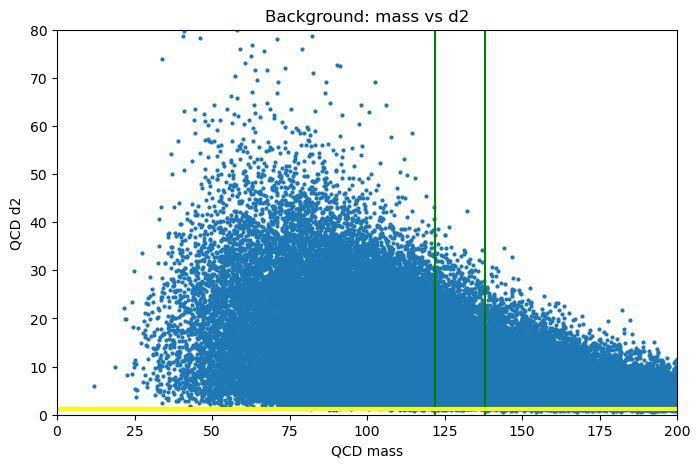

In [25]:
plt.figure(figsize=(8,5))
x = np.linspace(min(higgs_mass), max(higgs_mass), len(higgs_mass))
plt.scatter(qcd_mass, qcd_data[:,6], marker = '.', linewidth = 0.0001)
plt.vlines(122,0,100, colors='g')
plt.vlines(138,0,100, colors='g')
plt.hlines(1,0,200, colors='yellow')
plt.hlines(1.4,0,200, colors='yellow')
plt.xlim(0,200)
plt.ylim(0,80)
plt.title('Background: mass vs d2')
plt.xlabel('QCD mass')
plt.ylabel('QCD d2')
plt.show()


# lab8   Pseudo-experiment data analysis

In [26]:
# read LHC final pseudo-data set2
import pandas as pd
high_lumi = pd.read_hdf('data_highLumi_pt_1000_1200.h5')
low_lumi = pd.read_hdf('data_lowLumi_pt_1000_1200.h5')

In [27]:
# import data into array variable
high_data = np.array(high_lumi)
low_data = np.array(low_lumi)

access data ways

high_lumi.mass

high_data[0,3]

## part 1) High luminosity data

### 1-1 
plot observed dara overlapped with expected signal and and background (normalized to observed yields) without event selection

In [28]:
def pltFunct2(num):
    plt.hist(higgs_data[:,num], bins=100, density=True, alpha = 0.7, label='Higgs')
    plt.hist(qcd_data[:,num], bins=100, density=True, alpha = 0.7, label='QCD')
    plt.hist(high_data[:,num], bins=100, density=True, alpha = 0.7, label='High_luminosity')

    plt.legend()
    plt.xlabel(table1.columns[i])
    plt.ylabel('Density')
    #plt.yscale('log')
    plt.title(f'{table1.columns[i]} distrubution')
    plt.show()

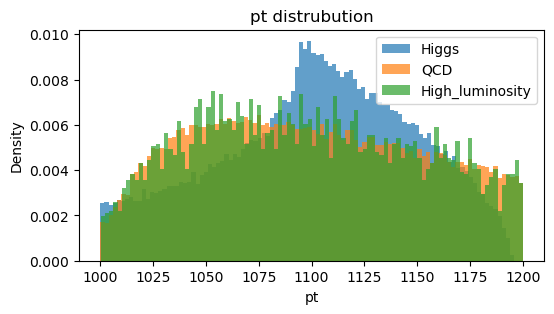

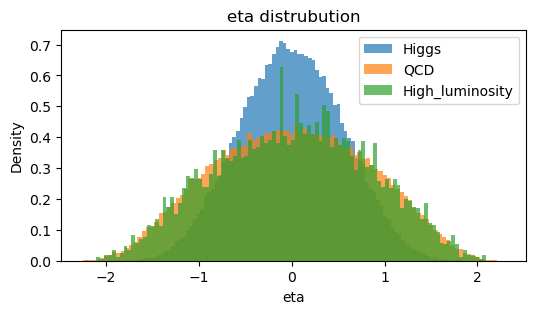

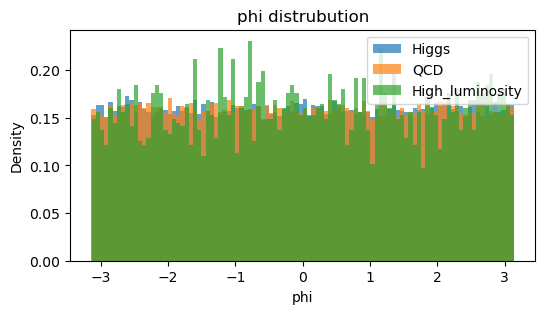

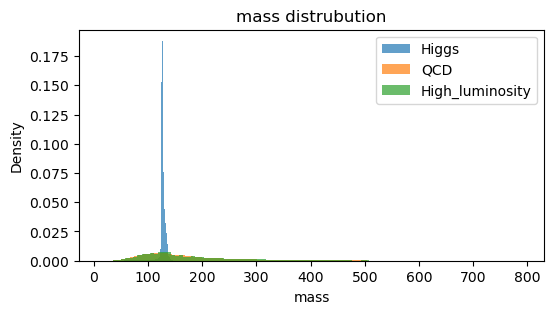

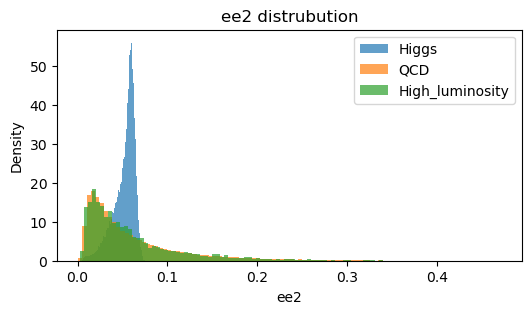

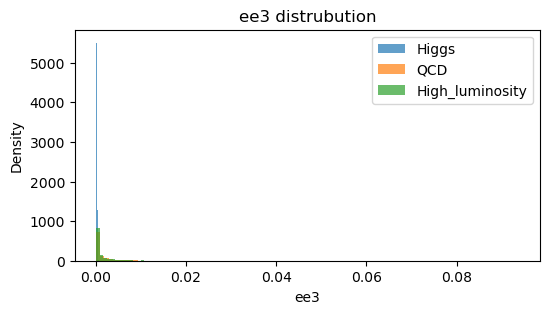

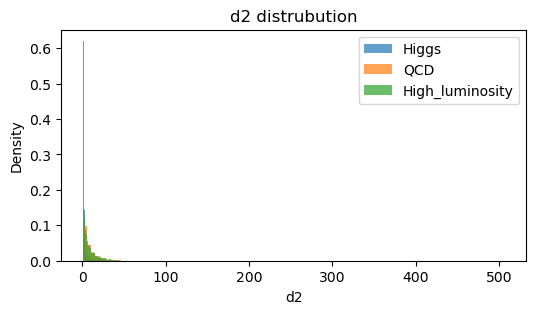

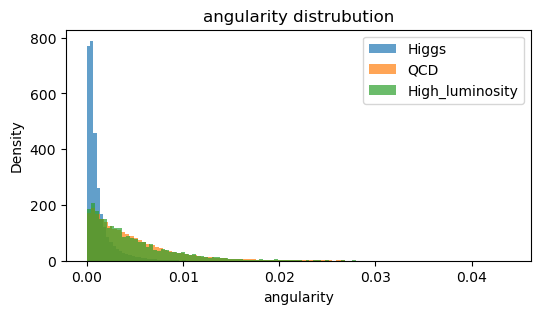

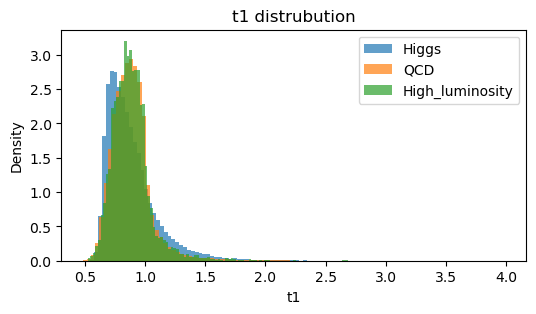

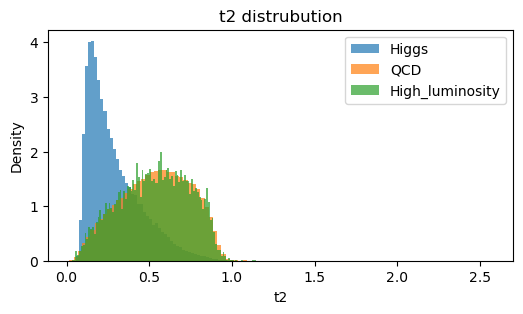

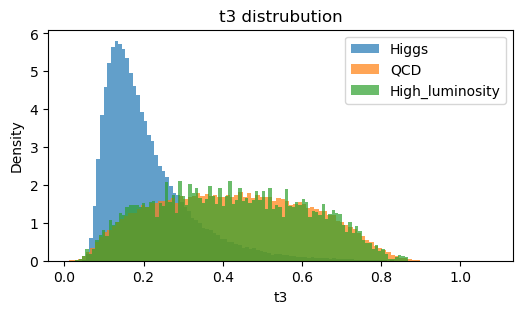

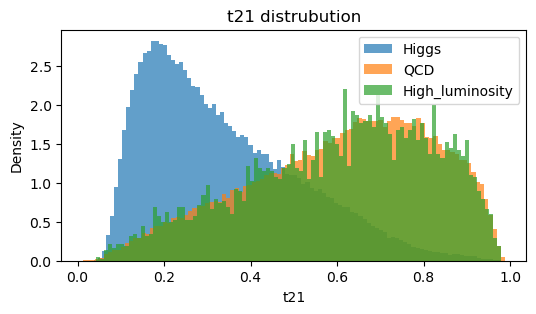

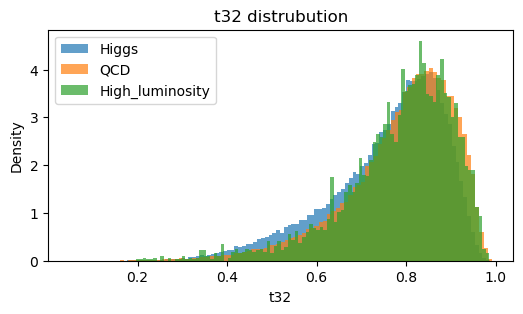

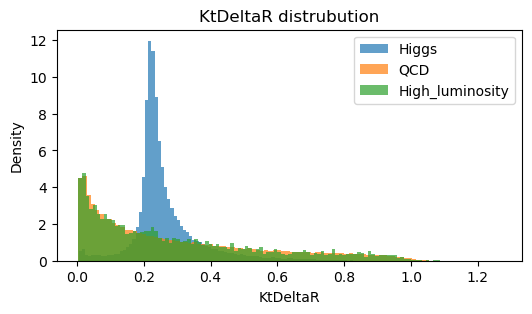

In [29]:
for i in range(14): 
    pltFunct2(i)

### 1-2 
plot observed data overlapped with expected signal and and background (normalized to observed yields) with event selection

mass_cut is (122,138) and d2_cut is (1,1.4)

In [30]:
higgs_cut = higgs_data[higgs_data[:,3]>122]
higgs_cut2 = higgs_cut[higgs_cut[:,3]<138]
higgs_cut3 = higgs_cut2[higgs_cut2[:,6] >= 1]
higgs_mask = higgs_cut3[higgs_cut3[:,6] <= 1.4]

qcd_cut = qcd_data[qcd_data[:,3]>122]
qcd_cut2 = qcd_cut[qcd_cut[:,3]<138]
qcd_cut3 = qcd_cut2[qcd_cut2[:,6] >= 1]
qcd_mask = qcd_cut3[qcd_cut3[:,6] <= 1.4]

high_cut = high_data[high_data[:,3]>122]
high_cut2 = high_cut[high_cut[:,3]<138]
high_cut3 = high_cut2[high_cut2[:,6] >= 1]
high_mask = high_cut3[high_cut3[:,6] <= 1.4]

def pltOpt2(num):
    
    plt.hist(higgs_mask[:,num], bins=100, density=True, alpha=0.7, label='Higgs')
    plt.hist(qcd_mask[:,num], bins=100, density=True, alpha=0.7, label='QCD')
    plt.hist(high_mask[:,num], bins=100, density=True, alpha=0.7, label='High_luminosity')
    plt.legend()
    plt.xlabel(table1.columns[i])
    plt.ylabel('Density')
    #plt.yscale('log')
    plt.title(f'{table1.columns[i]} distrubution with event selection')
    plt.show()

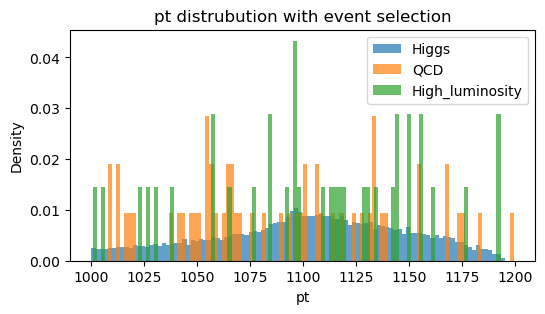

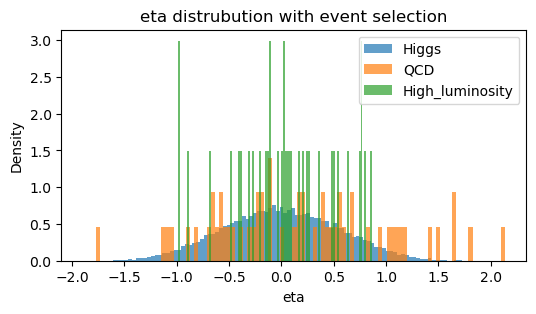

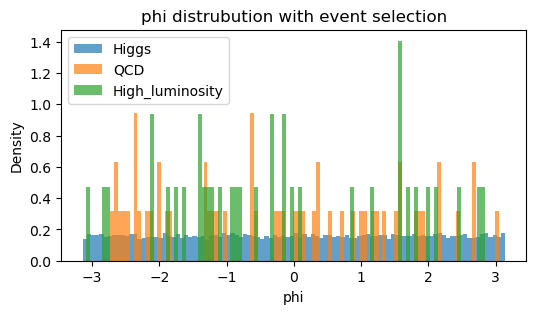

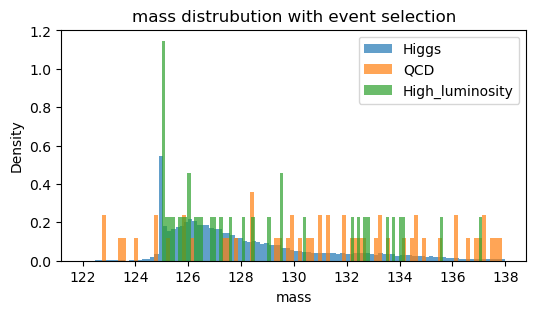

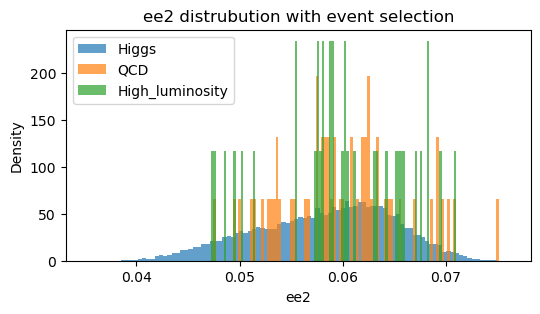

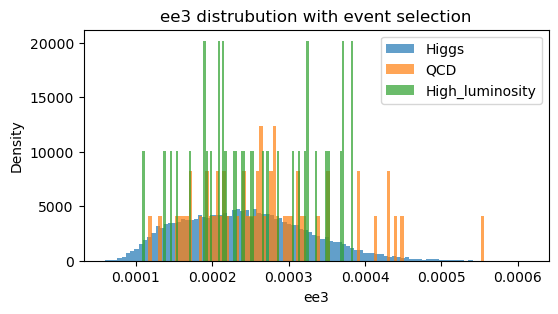

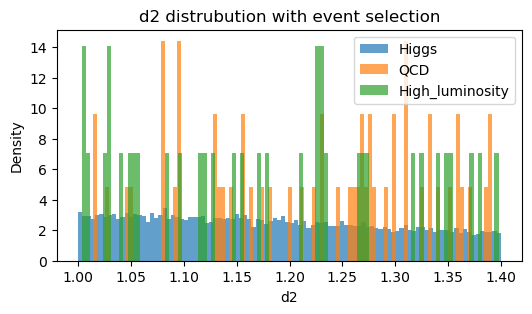

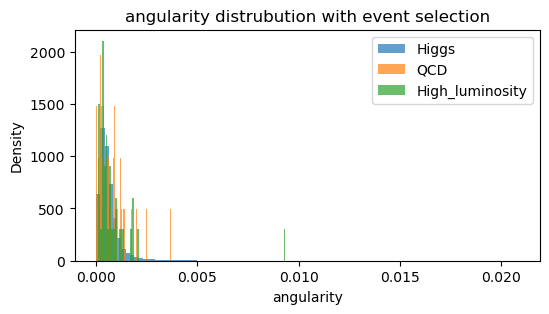

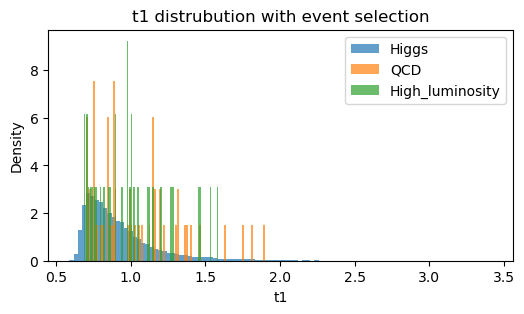

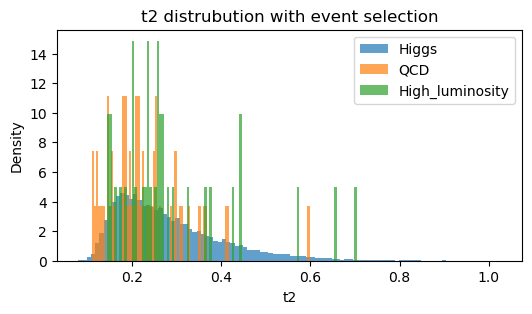

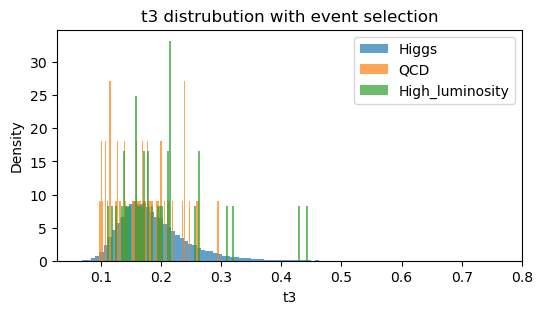

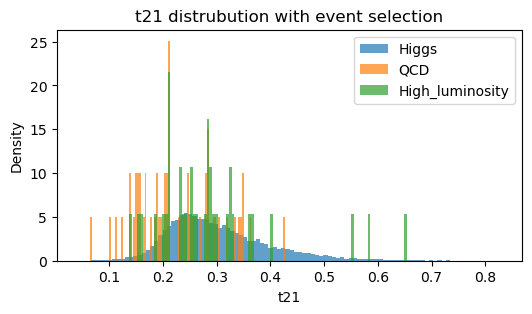

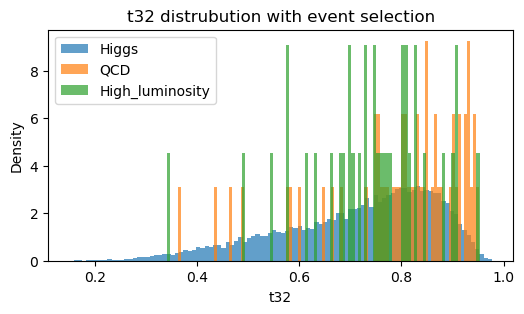

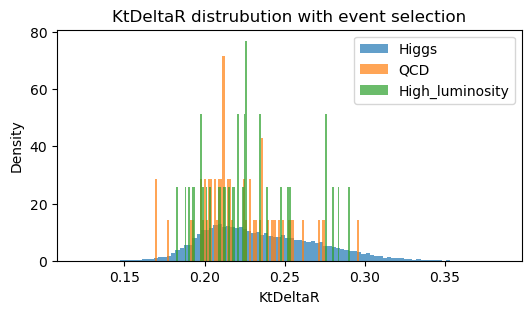

In [31]:
for i in range(14):
    # histograms with optimal mass cuts
    pltOpt2(i)

### 1-3 
compare observed significance and expected significance

In [32]:
# original high luminosity
len(high_lumi.mass)

4066

In [33]:
# selected high luminosity
len(high_mask[:,0])

36

In [34]:
obs_sig = stats.norm.isf(stats.poisson.sf(36, len(qcd_mask[:,0])*(2000/100000)))
obs_sig

13.662787592179178

Hence, after the event selection, the observed significance 𝑁𝐻𝑖𝑔𝑔𝑠/(√𝑁𝑄𝐶𝐷) is 13.6628

In [35]:
N_higgs = 50*len(higgs_mask[:,0])/100000
N_qcd = 2000*len(qcd_mask[:,0])/100000
exp_sig = N_higgs / np.sqrt(N_qcd)
exp_sig

10.839439445838515

Meanwhile, the expected significance is 10.8394.

We find that the observed significance is larger than the expected significance.

Hence, the observed significance is strong enough to claim the discovery, and we are able to reject the null hypothesis that Higgs boson not exist.

## part 2) Low luminosity data

### 2-1 
plot observed dara overlapped with expected signal and and background (normalized to observed yields) without event selection

In [36]:
def pltFunct3(num):
    plt.hist(higgs_data[:,num], bins=100, density=True, alpha = 0.7, label='Higgs')
    plt.hist(qcd_data[:,num], bins=100, density=True, alpha = 0.7, label='QCD')
    plt.hist(low_data[:,num], bins=100, density=True, alpha = 0.7, label='High_luminosity')

    plt.legend()
    plt.xlabel(table1.columns[i])
    plt.ylabel('Density')
    #plt.yscale('log')
    plt.title(f'{table1.columns[i]} distrubution')
    plt.show()

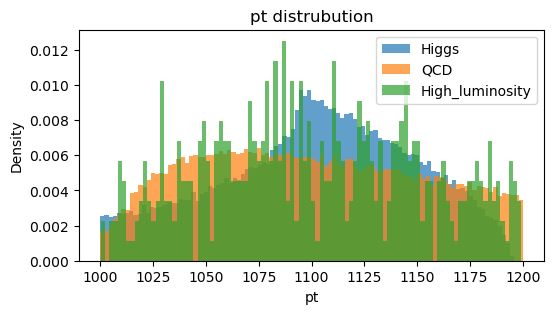

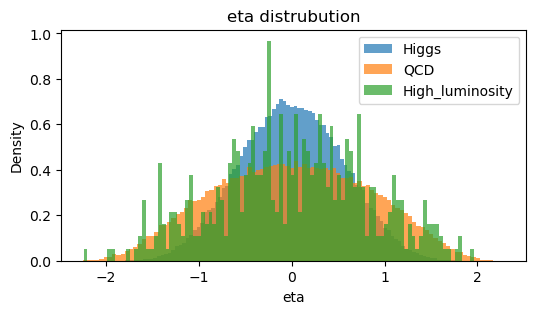

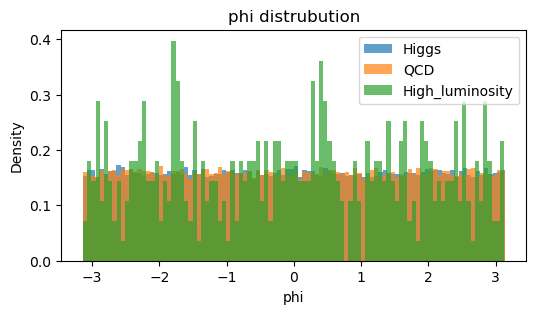

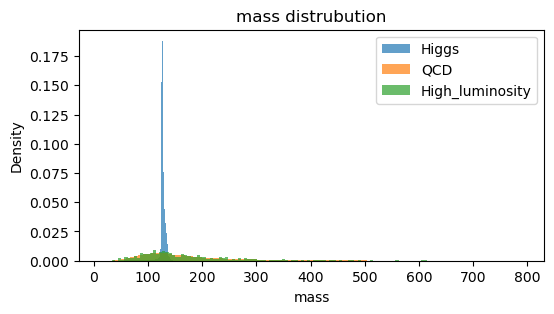

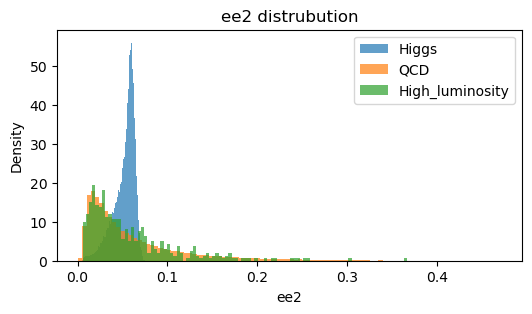

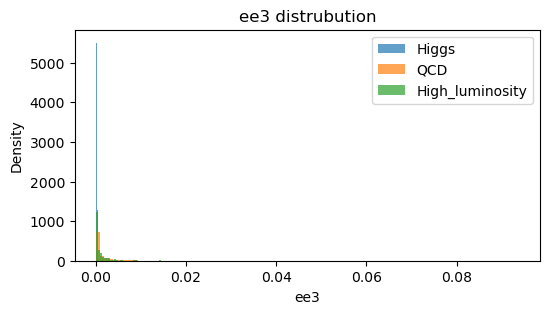

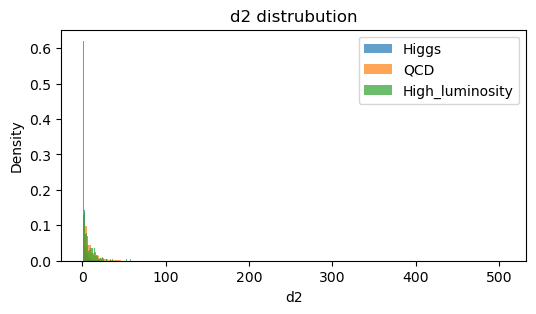

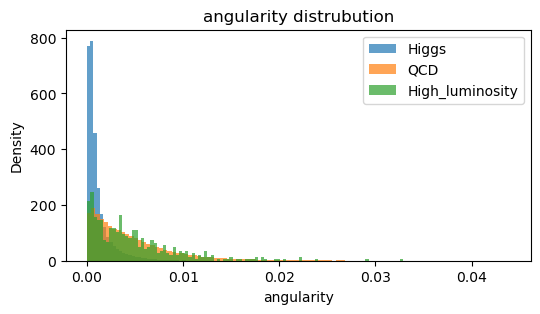

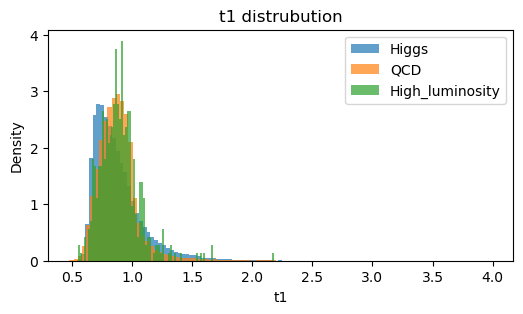

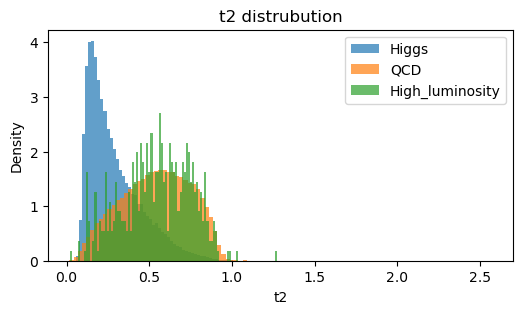

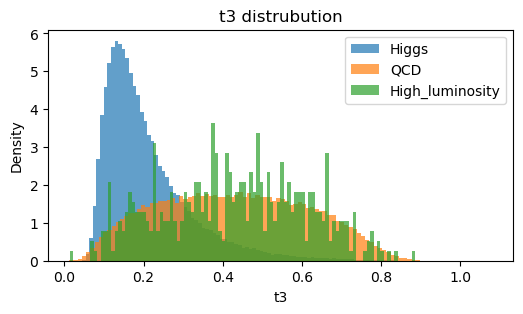

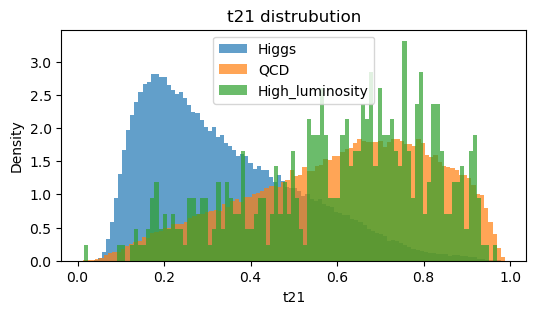

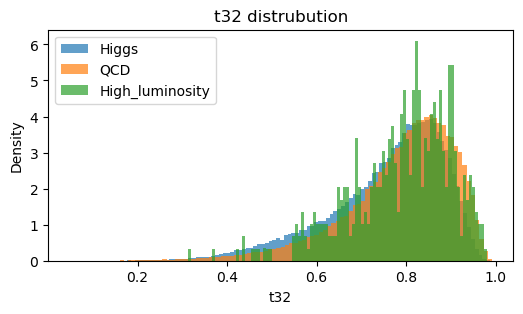

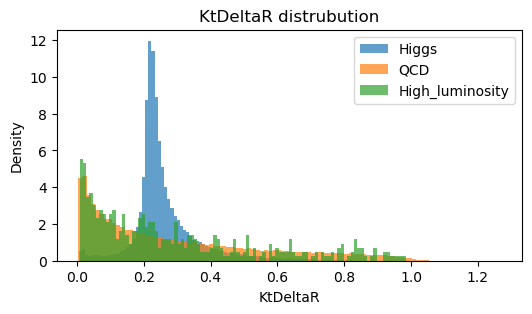

In [37]:
for i in range(14): 
    pltFunct3(i)

### 2-2 
plot observed dara overlapped with expected signal and and background (normalized to observed yields) with event selection

In [38]:
low_cut = low_data[low_data[:,3]>122]
low_cut2 = low_cut[low_cut[:,3]<138]
low_cut3 = low_cut2[low_cut2[:,6] >= 1]
low_mask = low_cut3[low_cut3[:,6] <= 1.4]

def pltOpt3(num):

    plt.hist(higgs_mask[:,num], bins=100, density=True, alpha=0.7, label='Higgs')
    plt.hist(qcd_mask[:,num], bins=100, density=True, alpha=0.7, label='QCD')
    plt.hist(low_mask[:,num], bins=100, density=True, alpha=0.7, label='Low_luminosity')
    plt.legend()
    plt.xlabel(table1.columns[i])
    plt.ylabel('Density')
    #plt.yscale('log')
    plt.title(f'{table1.columns[i]} distrubution with optimal mass cuts')
    plt.show()

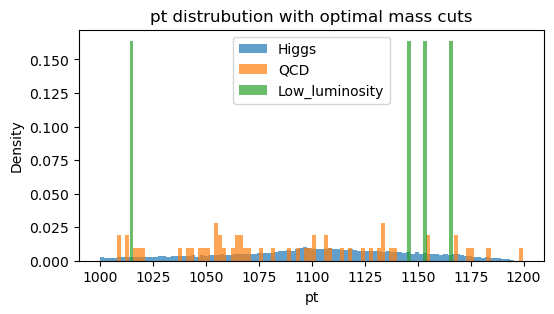

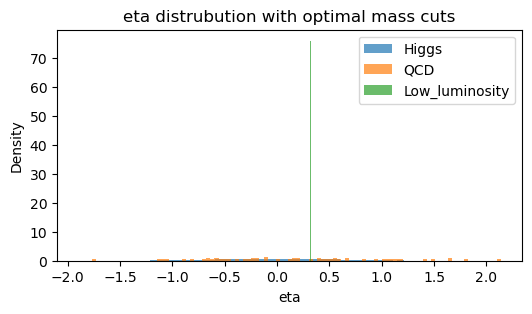

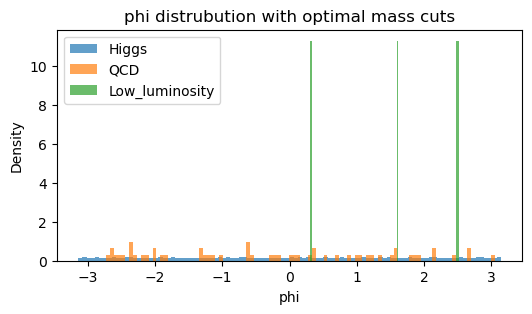

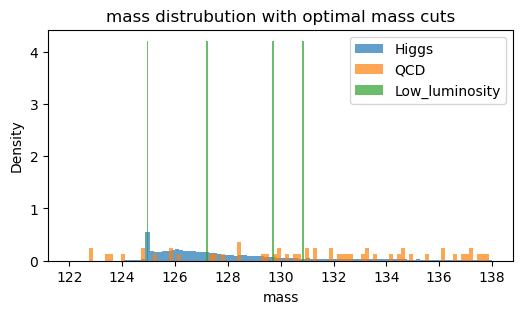

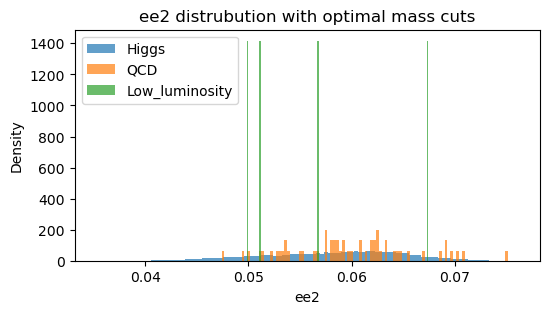

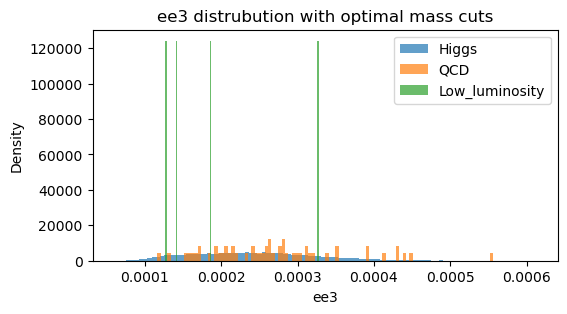

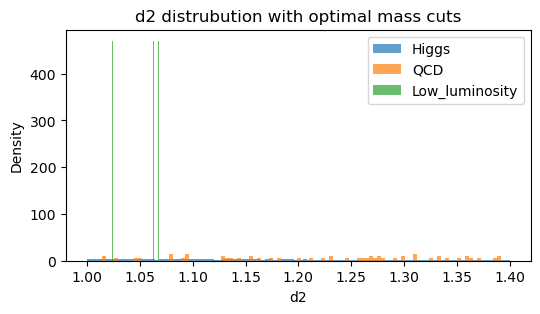

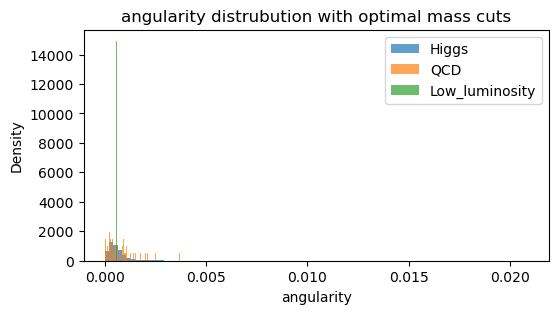

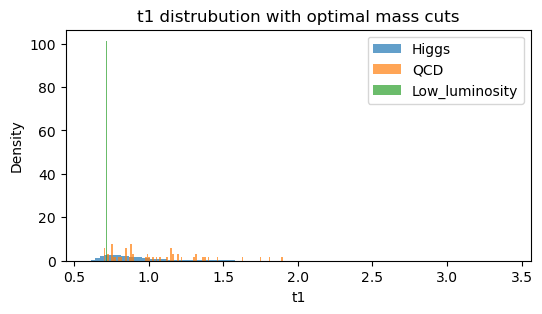

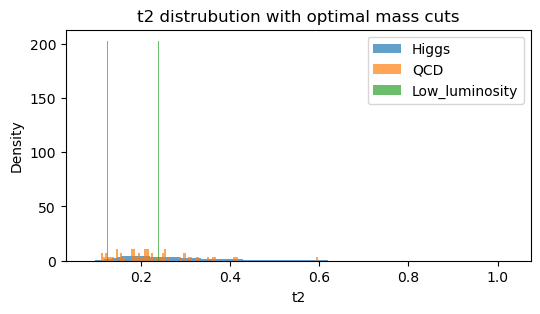

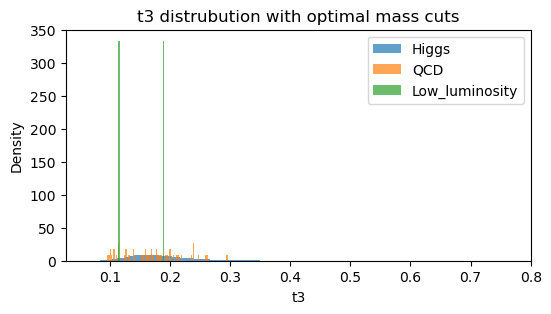

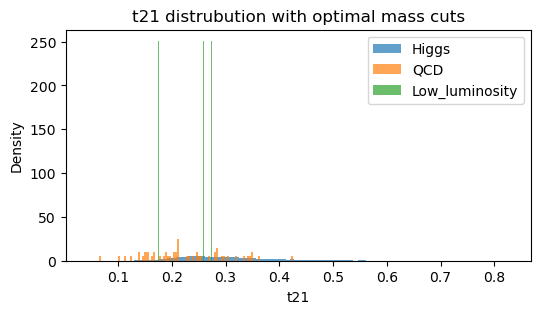

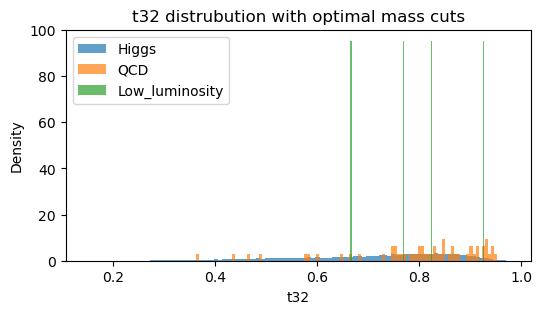

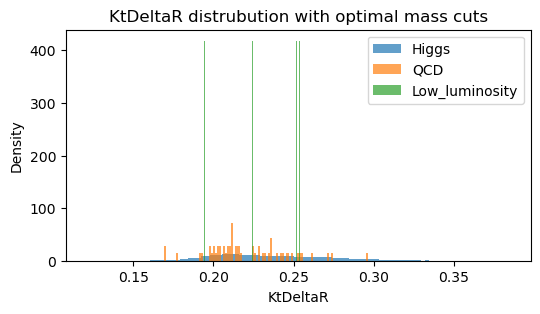

In [39]:
for i in range(14):
    # histograms with optimal mass cuts
    pltOpt3(i)

### 2-3 
compare observed significance and expected significance

In [40]:
# original low luminosity
len(low_lumi.mass)

442

In [41]:
# selected low luminosity
len(low_mask[:,0])

4

In [42]:
obs_sig2 = stats.norm.isf(stats.poisson.sf(4, len(qcd_mask[:,0])*(2000/100000)))
obs_sig2 

2.5468316255644616

Hence,we find the observed significance is 2.5468, which is much smaller than the expected significance. 

Comment on the difference: 
With comparison of part 1) and part 2), we find that observed significance of low luminosity is much smaller than the observed significance of high luminosity. Hence, we find our simulation optimal event cut is relatively harmonious with high luminosity data. 

## part 3) 95% Confidence Level of signal yields

In the low luminosity data, the observed significance is less than 5 𝜎 .

We will calculate the 95% confidence level upper limit of signal yield.

In [43]:
# Evaluate the expected 95% confidence level upper limit
ratio = len(low_lumi.mass) / 100000
upper_exp = stats.poisson.ppf(0.95, 2000*ratio*(len(higgs_mask[:,0])/100000))
upper_exp

5.0

In [44]:
# Evaluate the observed 95% confidence level upper limit
upper_obs = stats.poisson.ppf(0.95, len(low_mask[:,0]))
upper_obs

8.0

Hence, we find the expected 95% confidence level upper limit is 5 and the observed 95% confidence level upper limit is 8. Then the expected upper limit is smaller than the observed upper limit. Then, we can conclude that the confidence level of observed signal is higher than that of the expected signal.

## Bonus

Evalute the 1 𝜎  uncertainty of the expected 95% confidence level upper limit.

In [50]:
signal =  2000*ratio*(len(higgs_mask[:,0])/100000)
value = stats.poisson.ppf(stats.norm.cdf(1), signal) 
uncertainty = abs(signal - value)
print("The 1σ uncertainty is +-", '%.4f'%(uncertainty))

The 1σ uncertainty is +- 0.9900
